In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [45]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [46]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [67]:
train_data["BMI"]= train_data["Weight"]/((train_data["Height"])**2)
test_data["BMI"]= test_data["Weight"]/((test_data["Height"])**2)
train_data["Age"]= round(train_data["Age"],2)
test_data["Age"]= round(test_data["Age"],2)
train_data['BFP'] = (1.2*train_data['BMI']) + (0.23*train_data['Age'])
test_data['BFP'] = (1.2*test_data['BMI']) + (0.23*test_data['Age'])
# Checking for missing values in BMI
train_data["BMI"].isnull().sum()
test_data["BMI"].isnull().sum()
#RFM calculation
def calculate_RFM(weight, height, gender):
    if gender == "Male":
        rfm = 64 - (20 * height / weight) + 12
    elif gender == "Female":
        rfm = 64 - (20 * height / weight) - 12
    else:
        raise ValueError("Invalid gender. Please specify 'male' or 'female'.")
    return rfm

# Assuming train_data is a pandas DataFrame containing weight, height, and gender columns
train_data["RFM"] = train_data.apply(lambda row: calculate_RFM(row['Weight'], row['Height'], row['Gender']), axis=1)

# Assuming test_data is a pandas DataFrame containing weight, height, and gender columns
test_data["RFM"] = test_data.apply(lambda row: calculate_RFM(row['Weight'], row['Height'], row['Gender']), axis=1)

# display(train_data.head())
# display(test_data.head())



In [68]:
print(train_data.shape)

print(test_data.shape)

(20758, 21)
(13840, 20)


In [69]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,BFP,RFM
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841850,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,30.241842,41.773836,63.525236
std,5992.46278,5.688115,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,8.333932,10.493871,12.015581
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.868541,19.257022,51.118543
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,24.088223,33.705694,51.593124
50%,10378.50000,22.820000,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,29.384757,41.679247,51.767776
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,37.011168,50.722070,75.601472
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,54.997991,71.017085,75.762626


In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [71]:
train_data.nunique().sort_values()

SMOKE                                 2
Gender                                2
SCC                                   2
family_history_with_overweight        2
FAVC                                  2
CALC                                  3
CAEC                                  4
MTRANS                                5
NObeyesdad                            7
NCP                                 689
FCVC                                934
Age                                1066
TUE                                1297
FAF                                1360
CH2O                               1506
Height                             1833
Weight                             1979
BMI                               12605
RFM                               12877
BFP                               16265
id                                20758
dtype: int64

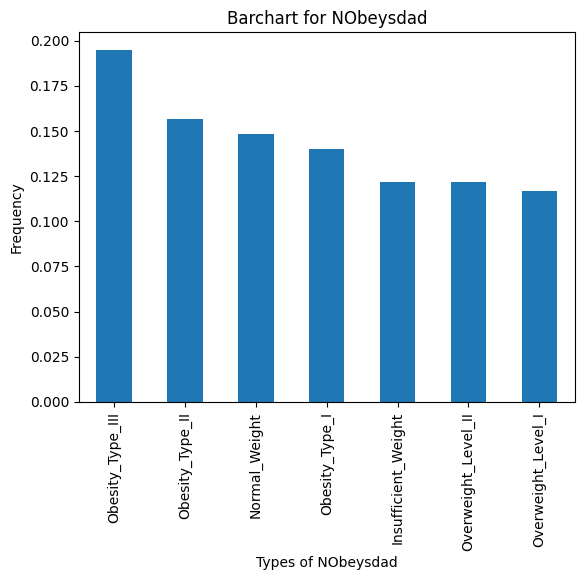

In [72]:
train_data["NObeyesdad"].value_counts(normalize=True).plot(kind="bar")
plt.title("Barchart for NObeysdad")
plt.ylabel("Frequency")
plt.xlabel("Types of NObeysdad")

Text(0.5, 0, 'Gender')

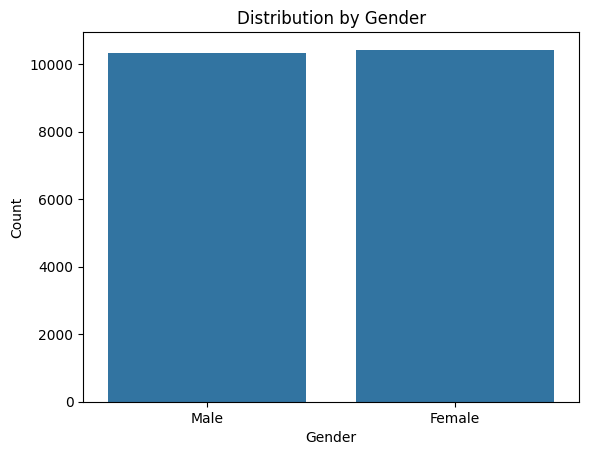

In [73]:
sns.countplot(train_data, x="Gender")
plt.title("Distribution by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

<Axes: xlabel='Gender', ylabel='count'>

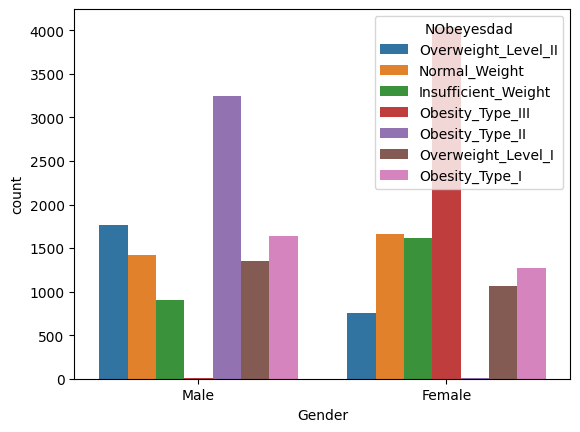

In [74]:
sns.countplot(train_data, x="Gender", hue = "NObeyesdad")

Text(0.5, 0, 'Age')

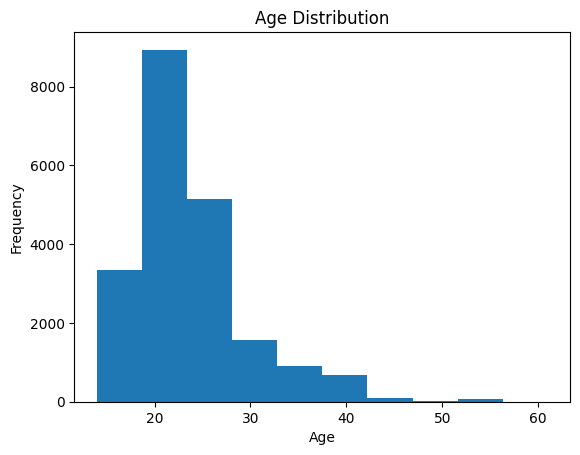

In [75]:
train_data["Age"].plot(kind="hist")
plt.title("Age Distribution")
plt.ylabel("Frequency")
plt.xlabel("Age")

<Axes: >

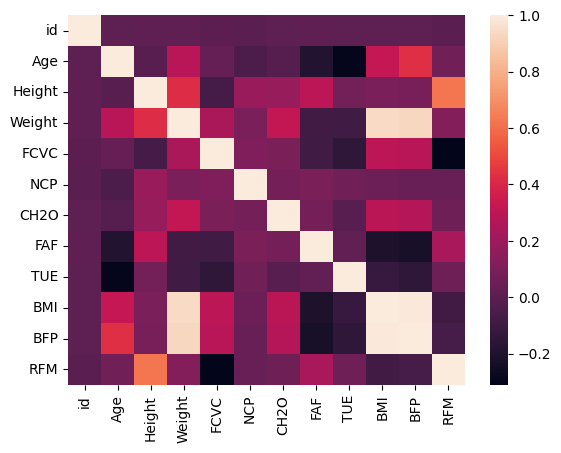

In [76]:
sns.heatmap(train_data.select_dtypes("number").corr())

In [77]:
target = "NObeyesdad"
X = train_data.drop(columns= target)
y= train_data[target]

In [78]:
# For Model 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
log = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(random_state=42)
)
log.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'family_history_with_overweight',
                                     'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                     'MTRANS'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [81]:
test =accuracy_score(y_test, log.predict(X_test))
train = accuracy_score(y_train, log.predict(X_train))
print(train, test)

0.8676984222570155 0.869942196531792


In [82]:
lgb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LGBMClassifier(random_state=42)
)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3083
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 34
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'family_history_with_overweight',
                                     'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                     'MTRANS'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [83]:
test =accuracy_score(y_test, lgb.predict(X_test))
train = accuracy_score(y_train, lgb.predict(X_train))
print(train, test)

0.9910875587137179 0.9019749518304432


In [84]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'family_history_with_overweight',
                                     'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                     'MTRANS'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [85]:
test =accuracy_score(y_test, model.predict(X_test))
train = accuracy_score(y_train, model.predict(X_train))
print(train, test)

1.0 0.8978805394990366


In [66]:
sub = log.predict(test_data)
sub2 = lgb.predict(test_data)
sub3= model.predict(test_data)
df_sub = pd.DataFrame({"NObeyesdad": sub}, index=test_data["id"])
df_sub.to_csv("Log.csv")
df_sub2 = pd.DataFrame({"NObeyesdad": sub2}, index=test_data["id"])
df_sub2.to_csv("Lgb.csv")
df_sub3 = pd.DataFrame({"NObeyesdad": sub3}, index=test_data["id"])
df_sub3.to_csv("submission.csv")